<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB
None
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little   

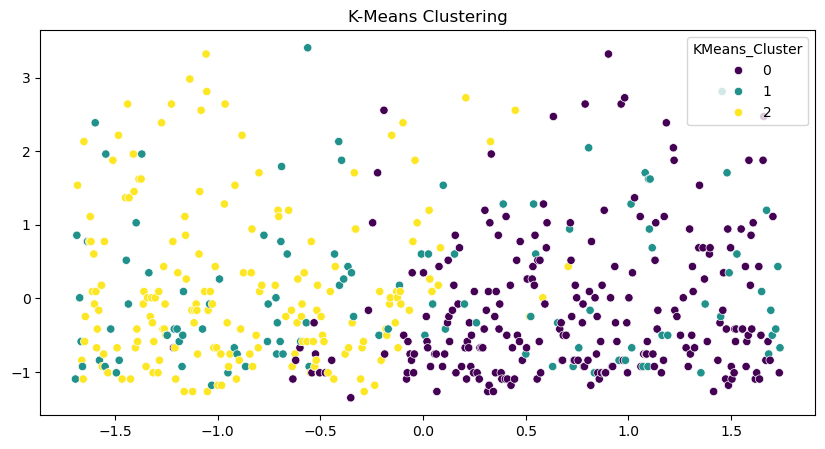

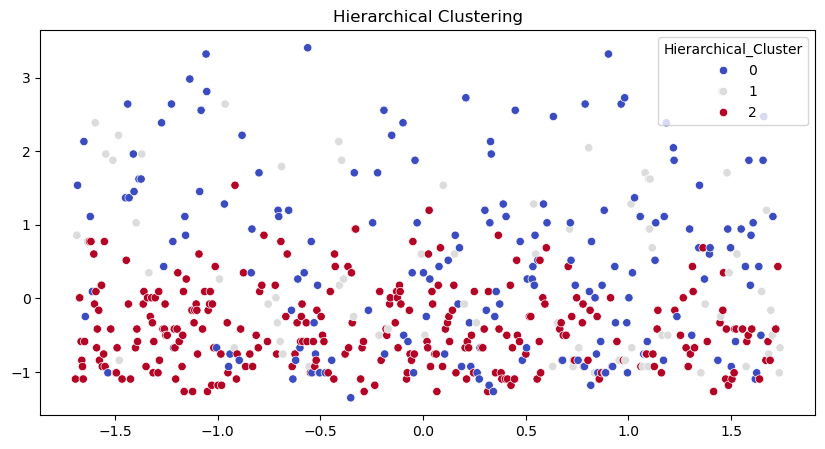

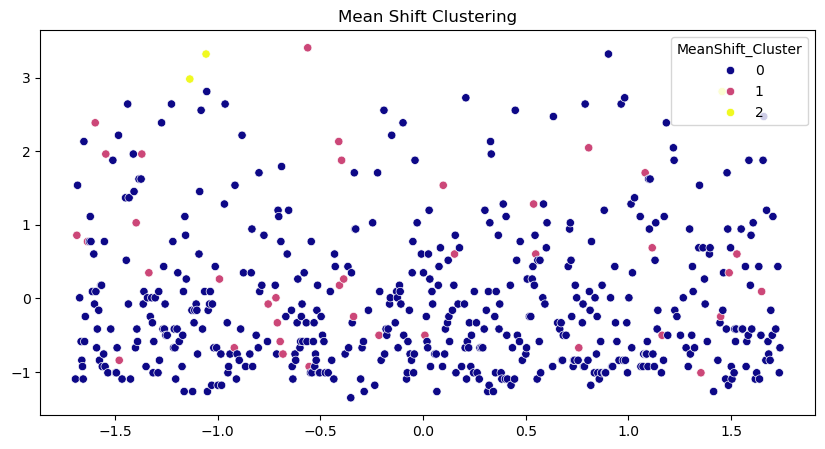

KMeans_Cluster
0    232
1    110
2    180
dtype: int64
Hierarchical_Cluster
0    175
1     70
2    277
dtype: int64
MeanShift_Cluster
0    481
1     38
2      3
dtype: int64


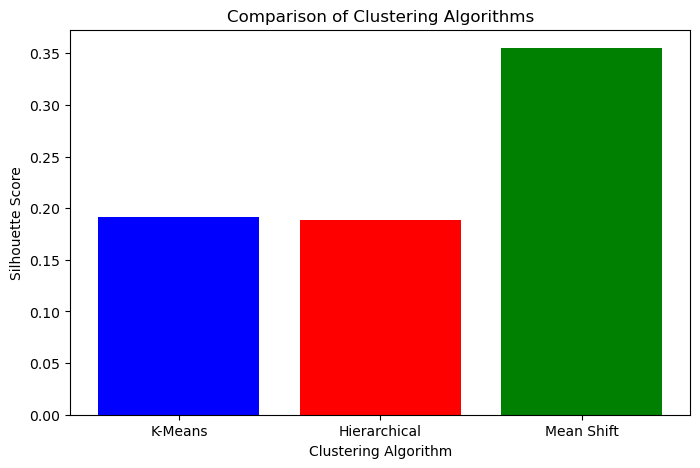

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset (Ensure you download and place 'credit_risk_dataset.csv' in the same directory)
df = pd.read_csv('german_credit_data.csv')

# Display basic info and first few rows
print(df.info())
print(df.head())

# Data Preprocessing
# Drop columns with too many missing values (if any)
df.dropna(inplace=True)

# Select numerical columns for clustering
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
data = df[num_cols]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# --- K-Means Clustering ---
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
df['KMeans_Cluster'] = kmeans_labels
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)

# --- Hierarchical Clustering ---
hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(data_scaled)
df['Hierarchical_Cluster'] = hc_labels
hc_silhouette = silhouette_score(data_scaled, hc_labels)

# --- Mean Shift Clustering ---
meanshift = MeanShift()
meanshift_labels = meanshift.fit_predict(data_scaled)
df['MeanShift_Cluster'] = meanshift_labels
meanshift_silhouette = silhouette_score(data_scaled, meanshift_labels)

# Visualization
plt.figure(figsize=(10,5))
sns.scatterplot(x=data_scaled[:,0], y=data_scaled[:,1], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x=data_scaled[:,0], y=data_scaled[:,1], hue=df['Hierarchical_Cluster'], palette='coolwarm')
plt.title('Hierarchical Clustering')
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x=data_scaled[:,0], y=data_scaled[:,1], hue=df['MeanShift_Cluster'], palette='plasma')
plt.title('Mean Shift Clustering')
plt.show()

# Compare cluster sizes
print(df.groupby('KMeans_Cluster').size())
print(df.groupby('Hierarchical_Cluster').size())
print(df.groupby('MeanShift_Cluster').size())

# Plot Silhouette Scores
algorithms = ['K-Means', 'Hierarchical', 'Mean Shift']
silhouette_scores = [kmeans_silhouette, hc_silhouette, meanshift_silhouette]

plt.figure(figsize=(8,5))
plt.bar(algorithms, silhouette_scores, color=['blue', 'red', 'green'])
plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Clustering Algorithms')
plt.show()